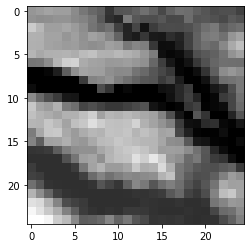

In [49]:
import numpy as np
from imageio import imread
import matplotlib.pyplot as plt
from tqdm import tqdm

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline

# Load the terrain
terrain = imread('data/SRTM_data_Norway_1.tif')

z = terrain[2000:2500:20, 500:1000:20]
z -= np.min(z)
z = z / np.max(z)

plt.imshow(z, cmap='gray')

x = np.linspace(0, 1, np.shape(z)[0])
y = np.linspace(0, 1, np.shape(z)[1])
x, y = np.meshgrid(x,y)

# X = np.c_[x.reshape(-1, 1), y.reshape(-1, 1)]

In [50]:
def create_X(x, y, n):
	if len(x.shape) > 1:
		x = np.ravel(x)
		y = np.ravel(y)

	N = len(x)
	l = int((n+1)*(n+2)/2)		# Number of elements in beta
	X = np.ones((N,l))

	for i in range(1,n+1):
		q = int((i)*(i+1)/2)
		for k in range(i+1):
			X[:,q+k] = (x**(i-k))*(y**k)

	return X[:, 1:]

X = create_X(x, y, 8)

In [51]:
X_train, X_test, z_train, z_test = train_test_split(X, z.reshape(-1, 1), test_size=0.3)

model = LinearRegression()
model.fit(X_train, z_train)
z_tilde = model.predict(X_train)
z_pred = model.predict(X_test)

Train MSE: 0.013952125258959268
Test MSE:  0.018958475661583277


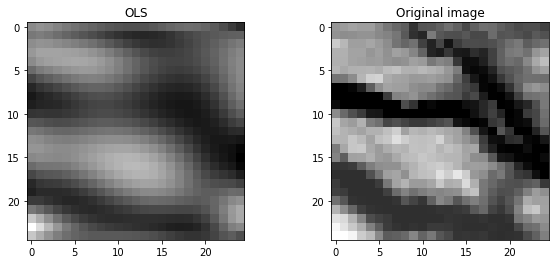

In [52]:
# print("Betas: {}\n".format(model.coef_))
print("Train MSE: {}".format(mean_squared_error(z_train, z_tilde)))
print("Test MSE:  {}".format(mean_squared_error(z_test, z_pred)))

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(model.predict(X).reshape(z.shape), cmap='gray')
ax1.set_title('OLS')
ax2.imshow(z, cmap='gray')
ax2.set_title('Original image')
fig.set_figwidth(10)

In [53]:
X_train, X_test, z_train, z_test = train_test_split(X, z.ravel(), test_size=0.3)

model = SGDRegressor(max_iter=10000, penalty=None, eta0=0.1)
model.fit(X_train, z_train)
z_tilde = model.predict(X_train)
z_pred = model.predict(X_test)

Train MSE: 0.049128147085845314
Test MSE:  0.06028468978412237


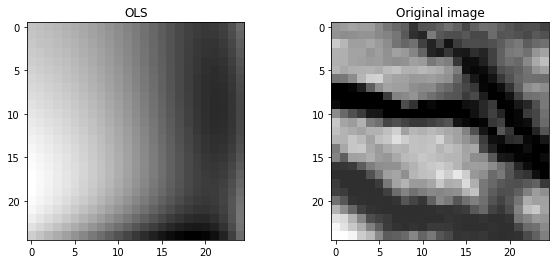

In [54]:
# print("Betas: {}\n".format(model.coef_))
print("Train MSE: {}".format(mean_squared_error(z_train, z_tilde)))
print("Test MSE:  {}".format(mean_squared_error(z_test, z_pred)))

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(model.predict(X).reshape(z.shape), cmap='gray')
ax1.set_title('OLS')
ax2.imshow(z, cmap='gray')
ax2.set_title('Original image')
fig.set_figwidth(10)